# Comparing goals scored in major European football leagues

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

with sqlite3.connect('/home/sibi/Springboard/Data/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    tempmatch = pd.read_sql_query("SELECT * from Match", con)

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [89]:
#Subsetting the five countries of interest
main_countries = ['England','France','Germany','Italy','Spain']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,name_y,country_id,name_y
0,1729,England,England,1729,England Premier League
1,4769,France,France,4769,France Ligue 1
2,7809,Germany,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,Italy,10257,Italy Serie A
4,21518,Spain,Spain,21518,Spain LIGA BBVA


In [4]:
def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

In [90]:
#Merge the leagues with corresponding matches
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.dropna(inplace=True)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


In [6]:
#Separating the leagues for plotting and further analysis
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
new_grouped_matches = new_matches.groupby('season')
english = new_matches[new_matches.name == "England"]
french = new_matches[new_matches.name == "France"]
italian = new_matches[new_matches.name == "Italy"]
spanish = new_matches[new_matches.name == "Spain"]
german = new_matches[new_matches.name == "Germany"]
# sum_goals = new_group_matches.home_team_goal.sum()
e = english.groupby('season')
f = french.groupby('season')
i = italian.groupby('season')
s = spanish.groupby('season')
g = german.groupby('season')
seasons

array([u'2008/2009', u'2009/2010', u'2010/2011', u'2011/2012',
       u'2012/2013', u'2013/2014', u'2014/2015', u'2015/2016'], dtype=object)

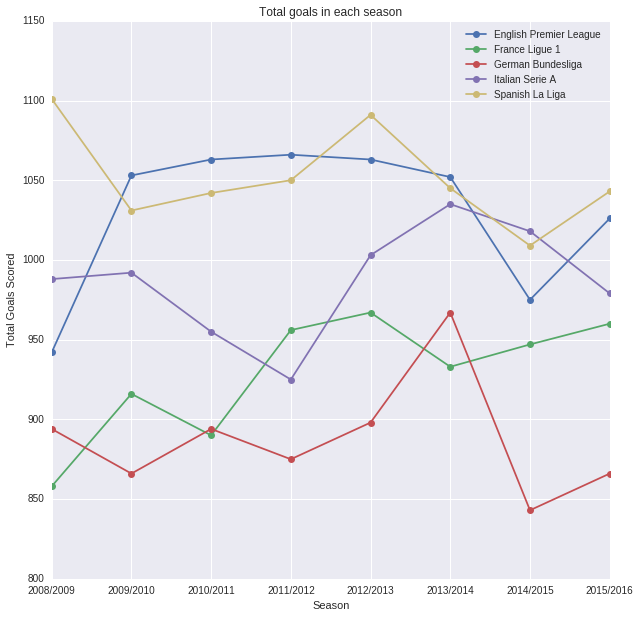

In [7]:
#Plotting total goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))
plt.plot(num_seasons,e.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,f.total_goals.sum().values,label = "France Ligue 1", marker = 'o')
plt.plot(num_seasons,g.total_goals.sum().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,i.total_goals.sum().values,label = "Italian Serie A", marker = 'o')
plt.plot(num_seasons,s.total_goals.sum().values,label = "Spanish La Liga", marker = 'o')
plt.legend()


As it's always believed (and most often seen), the Spanish La Liga teams resort to much more aggressive tactics and formations every game as compared to the other leagues' teams. This translates directly to more goals being scored than in other leagues.

Also, even though it might look like the Bundesliga teams scored lesser number of goals each season, it is to be remember that they play lesser games compared to the other leagues. In Bundesliga, there are only 18 teams playing each season and hence, they play a total of 306 games. In contrast, the other leagues have 20 teams and hence end up playing 380 games. 

Therefore, it would be a good idea to look at the average number of goals scored each seasons.


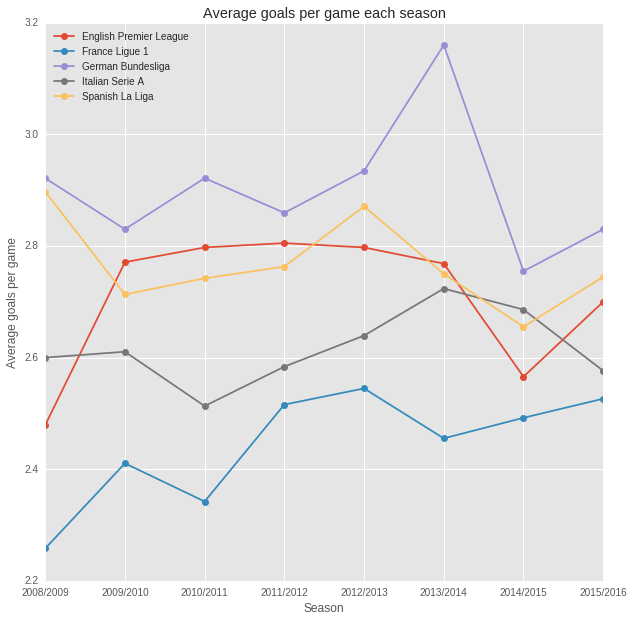

In [13]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")
plt.plot(num_seasons,e.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,f.total_goals.mean().values,label = "France Ligue 1", marker = 'o')
plt.plot(num_seasons,g.total_goals.mean().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,i.total_goals.mean().values,label = "Italian Serie A", marker = 'o')
plt.plot(num_seasons,s.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')
#plt.xlim = (-20,20)
plt.legend(loc = 2)


The Bundesliga teams score way more on average in each game that the teams in other leagues. And teams in Ligue 1 scored the least number of goals on a per game basis. In the 2013/2014 season, Bundesliga teams scored more than 3 goals each game on an average! 

### Home team advantage?
There is always the conspicuous home team advantage in every sport but does it truly exist? Do teams really end up scoring more goals at their home stadium than when playing at an away fixture?

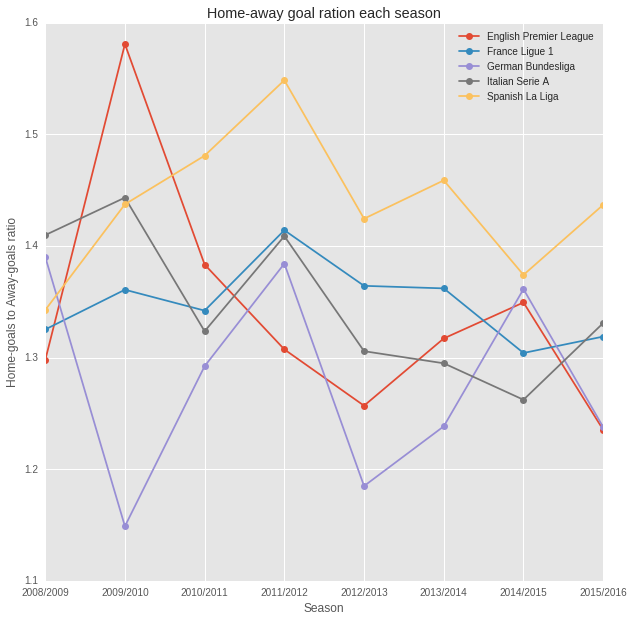

In [14]:
#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ration each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,e.home_team_goal.mean().values / e.away_team_goal.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,f.home_team_goal.mean().values / f.away_team_goal.mean().values,label = "France Ligue 1", marker = 'o')
plt.plot(num_seasons,g.home_team_goal.mean().values / g.away_team_goal.mean().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,i.home_team_goal.mean().values / i.away_team_goal.mean().values,label = "Italian Serie A", marker = 'o')
plt.plot(num_seasons,s.home_team_goal.mean().values / s.away_team_goal.mean().values,label = "Spanish La Liga", marker = 'o')
#plt.xlim = (-20,20),
plt.legend(loc = 1)


In the last five seasons, La Liga teams have had a strong home advantage. This could be a key factor in giving a boost to la liga teams when they entertain teams from other leagues for European Leagues like the UEFA Championship or the Europa League.

Apart from that, other leagues seem to vary significantly and not show any significant trends except the Bundesliga again which keeps shifting between a strong home game and weak home game season. 

All the (home-goals/away-goals) ratios are above 1 and most leagues we can consistently see the ratio being above 1.3. This only shows that teams score more at home than away. But how many of these matches do they win among these?

Again, since Bundesliga teams play 74 fewer games than the other league teams, let's plot the home-away win ratio for each league every season.

In [85]:
#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
e_hw = np.true_divide(english[english.result == 1].groupby('season').result.sum().values,english[english.result == -1].groupby('season').result.sum().values * -1)
f_hw = np.true_divide(french[french.result == 1].groupby('season').result.sum().values,french[french.result == -1].groupby('season').result.sum().values *-1)
g_hw = np.true_divide(german[german.result == 1].groupby('season').result.sum().values,german[german.result == -1].groupby('season').result.sum().values*-1)
i_hw = np.true_divide(italian[italian.result == 1].groupby('season').result.sum().values,italian[italian.result == -1].groupby('season').result.sum().values*-1)
s_hw = np.true_divide(spanish[spanish.result == 1].groupby('season').result.sum().values,spanish[spanish.result == -1].groupby('season').result.sum().values*-1)

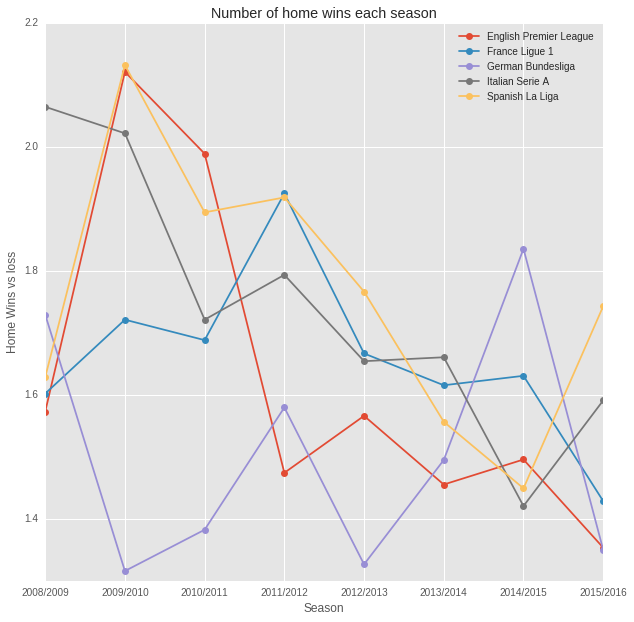

In [87]:
#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,e_hw,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,f_hw,label = "France Ligue 1", marker = 'o')
plt.plot(num_seasons,g_hw,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,i_hw,label = "Italian Serie A", marker = 'o')
plt.plot(num_seasons,s_hw,label = "Spanish La Liga", marker = 'o')
plt.legend(loc = 1)


We can see that a few leagues are winning less and less matches at home recently. In particular, there seems to be a steady decrease in the French Ligue and the English Premier League. Nevertheless, it is to be noted that we are plotting only the home wins against the home losses and not taking draws into consideration. 

We could do one of two things :
1. Include draw as a home-loss
2. Include draw as a home-win

In [124]:
# fig = plt.figure(figsize=(15, 10))
# plt.style.use('ggplot')
# ax1 = fig.add_subplot(131)
# ax1.set_xticks(range(len(seasons)))
# ax1.set_xticklabels(seasons)
# ax1.set_xlim(-1,8.5)
# ax1.set_ylim(1.2,2.3)
# ax1.set_title("Number of home wins each season")
# ax1.set_xlabel("Season")
# ax1.set_ylabel("Home Wins vs loss")
# ax1.plot(num_seasons,e_hw,label = "English Premier League", marker = 'o')
# ax1.plot(num_seasons,f_hw,label = "France Ligue 1", marker = 'o')
# ax1.plot(num_seasons,g_hw,label = "German Bundesliga", marker = 'o')
# ax1.plot(num_seasons,i_hw,label = "Italian Serie A", marker = 'o')
# ax1.plot(num_seasons,s_hw,label = "Spanish La Liga", marker = 'o')
# ax1.legend(loc = 1)